# Breast Cancer Data Set

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to provide an implementation of logistic regression
from sklearn.linear_model import LogisticRegression

# to provide an implementation of the accuracy metric
from sklearn.metrics import accuracy_score

 # for creating a train and test set # for creating a train and test set
from sklearn.model_selection import train_test_split

# to provide an implementation of PCA for reducing the dimensionality of our data
from sklearn.decomposition import PCA

# for evaluating our model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# import dataset loader
from sklearn.datasets import load_breast_cancer

# to scale our data so that we can perform "sensible" clustering
from sklearn.preprocessing import StandardScaler

In [16]:
# load dataset
data = load_breast_cancer()

In [17]:
# convert features to a pandas dataframe
X = pd.DataFrame(data['data'],columns=data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# target variable categories 
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [19]:
# convert target to a pandas series
y = pd.Series(data.target, name='target')

# Preprocessing the Data

In [20]:
# check the data balance
y.value_counts()

1    357
0    212
Name: target, dtype: int64

In [21]:
# dimensions of the data
X.shape

(569, 30)

In [22]:
# Looking for missing information and checking for datatypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [29]:
# perform the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [32]:
# Find the top predictors of breast cancer
a = []
for i in range(X_train.shape[1]): # the shpae gives the number of columns therefore the number of features in the data
    
    # Crete an instance of the classifier
    classify = LogisticRegression()
    
    # Train the logistic regression classfier - fit the data
    classify.fit(X_train[X_train.columns[i]].to_numpy().reshape(-1, 1), y_train)
    
    # predict the class for each of the functions
    y_pred = classify.predict(X_train[X_train.columns[i]].to_numpy().reshape(-1, 1))
    
    # accuracy score gives the value of the proportion of the predicted class that matches the actual class
    a.append(accuracy_score(y_train,y_pred))

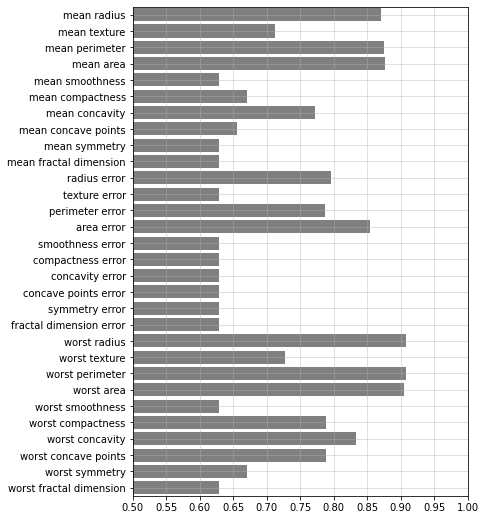

In [37]:
# visualize accuracy vs feature used for classification
plt.figure(figsize = (6,9))
sns.barplot(x=a, y=X_train.columns, color='grey')
plt.xticks(np.arange(0,1.05,0.05))
plt.xlim(0.5,1)
plt.grid(alpha=0.5)
plt.show()

 worst radius and worst area yeild the best accuracy as classifiers


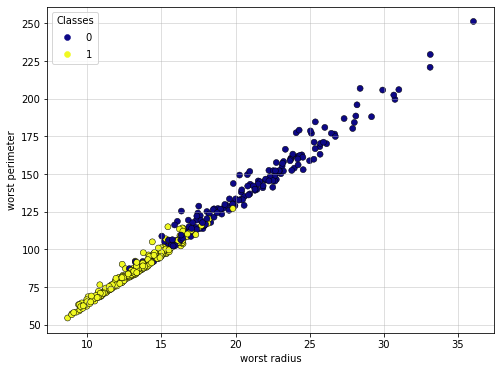

In [39]:
# visualize worst radius vs worst area with color as the target
plt.figure(figsize=(8,6))
plot = plt.scatter(X_train['worst radius'], X_train['worst perimeter'], c=y_train, 
                   linewidth=0.5, edgecolors='black', cmap='plasma')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('worst radius')
plt.ylabel('worst perimeter')
plt.grid(alpha=0.5)
plt.show()

# Creating our Model

In [43]:
# train and test data with the two features that have the highest predictibility
X_train_reduced = X_train[['worst radius', 'worst perimeter']]
X_test_reduced = X_test[['worst radius', 'worst perimeter']]

In [45]:
# Create an instance of the classifier
classifier_new = LogisticRegression()

# Fit the model with the new features dataset
classifier_new.fit(X_train_reduced, y_train)

LogisticRegression()

In [47]:
# Predictions
y_pred = classifier_new.predict(X_test_reduced)

# Print the accuracy of the classifier
accuracy_score(y_test,y_pred)

0.9649122807017544

# Visualize the Decision Boundary


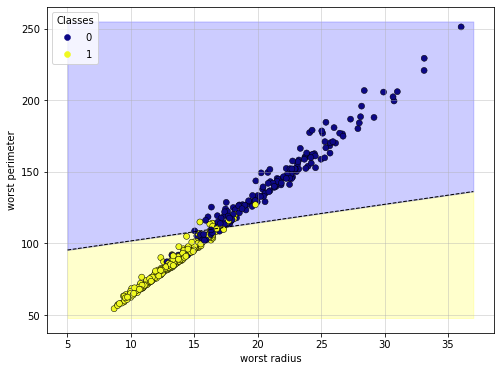

In [49]:
# obtain model parameters/coefficients
b = classifier_new.intercept_[0]
w1, w2 = classifier_new.coef_.T

# solve for the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# visualise the decision boundary
xmin, xmax = 5, 37
ymin, ymax = 48, 255
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.figure(figsize=(8,6))
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='yellow', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='blue', alpha=0.2)
plot = plt.scatter(X_train['worst radius'], X_train['worst perimeter'], c=y_train,
                   linewidth=0.5, edgecolors='black', cmap='plasma')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('worst radius')
plt.ylabel('worst perimeter')
plt.grid(alpha=0.5)
plt.show()

# Using PCA for Finding the Features

In [61]:
# we want to reduce the dimensionality of our data to 2 dimensions for easy visualization

# Standardize the features
scaler = StandardScaler()

# we want to reduce the dimensionality of our data to 2 dimensions for easy visualization
pca = PCA(n_components=2)

# fit our pca object to the scaled data
X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))

# explained variance is the fraction of the total variance in the entire dataset that a principal component accounts for
pca.explained_variance_ratio_

array([0.43502782, 0.19500007])

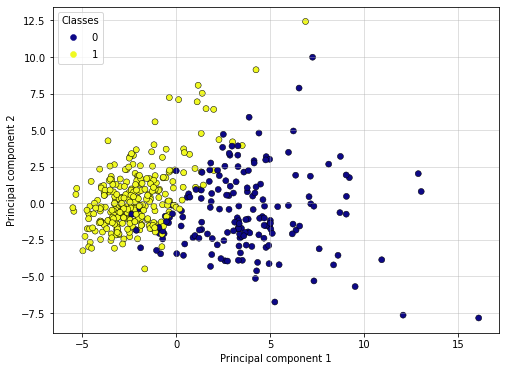

In [62]:
# visualize PC1 vs PC2 with color as the target
plt.figure(figsize=(8,6))
plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, 
                   linewidth=0.5, edgecolors='black', cmap='plasma')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.grid(alpha=0.5)
plt.show()

In [70]:
# evaluate by first projecting test set onto our principal components
X_test_pca = pca.transform(scaler.fit_transform(X_test))

# generate predictions on the test set
predicted_y = classifier_new.predict(X_test_pca)

# print out the accuracy of our classifier on the test set
accuracy_score(y_test, predicted_y)

C:\Users\Niranjana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6228070175438597

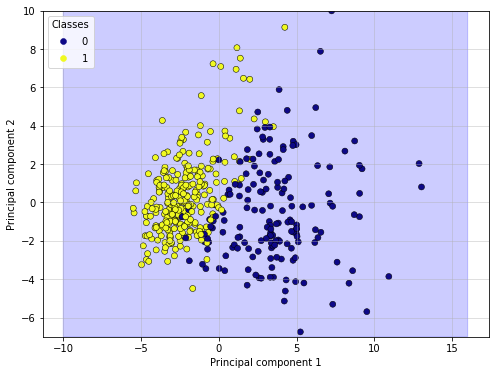

In [72]:
# obtain model parameters/coefficients
b = classifier_new.intercept_[0]
w1, w2 = classifier_new.coef_.T

# solve for the intercept and gradient of the decision boundary
c = -b/w2
m = -w1/w2

# visualise the decision boundary
xmin, xmax = -10, 16
ymin, ymax = -7, 10

xd = np.array([xmin, xmax])

yd = m*xd + c

plt.figure(figsize=(8,6))
plt.plot(xd, yd, 'k', lw=1, ls='--')

plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='yellow', alpha=0.2)

plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, 
                   linewidth=0.5, edgecolors='black', cmap='plasma')
plt.legend(*plot.legend_elements(),
                    loc="upper left", title="Classes")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.ylim(-7,10)
plt.grid(alpha=0.5)
plt.show()